## 7.1 贝叶斯定理

## 7.2 生成模型和判别模型

## 7.3 朴素贝叶斯

### 朴素贝叶斯的假设

## 7.4 在 scikit-learn 中使用朴素贝叶斯

代码 7.1

In [1]:
%matplotlib inline

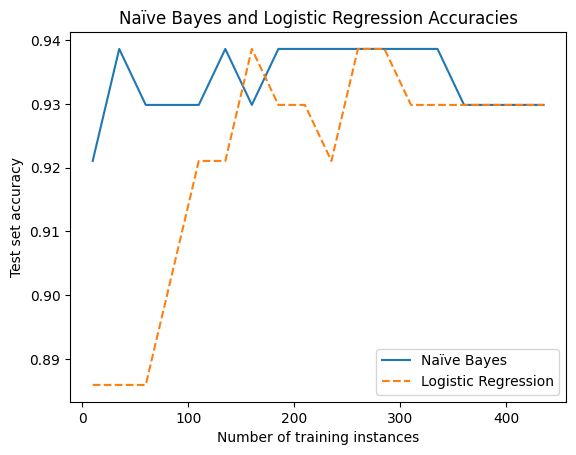

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)#加载数据
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=31)
lr = LogisticRegression(solver='liblinear',max_iter=1000)
# GaussianNB是一种基于高斯分布的朴素贝叶斯分类器，适用于处理连续特征的分类任务。它假设每个特征的值都服从高斯分布，并利用贝叶斯定理进行分类。
nb = GaussianNB()
lr_scores = []
nb_scores = []
train_sizes = range(10, len(X_train), 25)
for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train, y_train, train_size=train_size, stratify=y_train,
                                              random_state=31)
    nb.fit(X_slice, y_slice)
    nb_scores.append(nb.score(X_test, y_test))
    lr.fit(X_slice, y_slice)
    lr_scores.append(lr.score(X_test, y_test))
plt.plot(train_sizes, nb_scores, label='Naïve Bayes')
plt.plot(train_sizes, lr_scores, linestyle='--', label='Logistic Regression')
plt.title("Naïve Bayes and Logistic Regression Accuracies")
plt.xlabel("Number of training instances")
plt.ylabel("Test set accuracy")
plt.legend()

代码 7.2

In [3]:
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

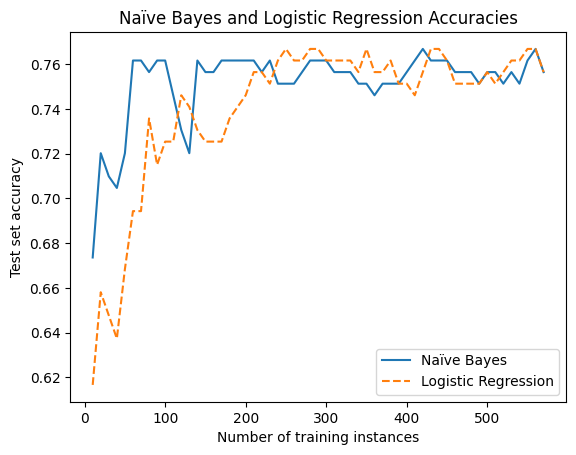

In [4]:
# df = pd.read_csv('./pima-indians-diabetes.data', header=None)
df = pd.read_csv('./diabetes.csv', header=None)
y = df[8]
X = df[[0, 1, 2, 3, 4, 5, 6, 7]]
from sklearn.utils import resample

X, y = resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=11)
lr = LogisticRegression(solver='liblinear', max_iter=1000)
nb = GaussianNB()
lr_scores = []
nb_scores = []
train_sizes = range(10, len(X_train), 10)
for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(X_train, y_train, train_size=train_size, stratify=y_train,
                                              random_state=11)
    nb.fit(X_slice, y_slice)
    nb_scores.append(nb.score(X_test, y_test))
    lr.fit(X_slice, y_slice)
    lr_scores.append(lr.score(X_test, y_test))
plt.plot(train_sizes, nb_scores, label='Naïve Bayes')
plt.plot(train_sizes, lr_scores, linestyle='--', label='Logistic Regression')
plt.title("Naïve Bayes and Logistic Regression Accuracies")
plt.xlabel("Number of training instances")
plt.ylabel("Test set accuracy")
plt.legend()